# **1. Single plot**

Currentlyworking on WO07111_freq2_June


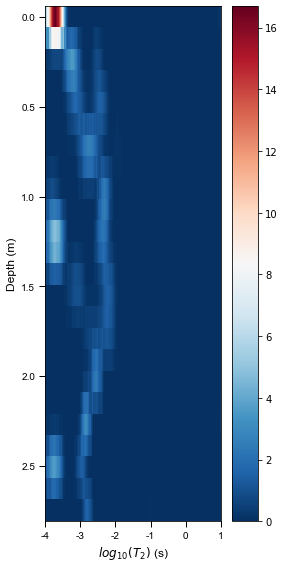

In [1]:
# 2-D T2-dist plotting

import numpy as np
import matplotlib.pyplot as plt
import os.path

import getBoreholeName as gbn
import interpolation as ip
import loadMat as lmat
import pltpcolormesh as pltpcm
%matplotlib inline

if __name__ =="__main__":   
    fileDir = 'D:/Github/DartPy/example-data/data/'
    figDir = 'D:/Github/DartPy/example-data/figure/'
    # when there are many boreholes
    boreholeNames = gbn.getBoreholeName(fileDir)    
    # Dart measurements with two frequencies
    freqs = ['freq1', 'freq2']
    # Dart experiments conducted on Jun and Sep
    months = ['June','sep']      
    
    # a_index = [(0,0),(0,1),(1,0),(1,1)] # index to simplize the index 
    # a for loop when usually there are many boreholes
    for i in range(len(boreholeNames)):    
        # for j in a_index: 
        
        # this is how the inversion *.mat was named
        # select the frequency to visulize the data in each experiment
        # example: a ridge plot of T2-dist measured at freq2 from experiment conducted in Jun 
        fileName = boreholeNames[i] + '_' + freqs[1] + '_' + months[0]   
        
        path2MatFile = os.path.join(fileDir, fileName + '.mat')
        print("Currently working on", fileName)
        # load mat file
        T2, depth, T2dist, T2ml = lmat.loadMat(path2MatFile)  

        fig = plt.figure(figsize=(4,8))
        ax = fig.add_subplot(111)
        # interpolate the data from each depth 
        # both methods in the following working well
#         T2_RBS, depth_RBS,T2dist_RBS = ip.interpolation_RBS(T2, depth, T2dist)
#         pbar = pltpcm.pltpcolormesh(T2_RBS, depth_RBS,T2dist_RBS, ax, T2dist_RBS.max())
        T2_gd, depth_gd,T2dist_gd = ip.interpolation_griddata(T2, depth, T2dist)
        pbar = pltpcm.pltpcolormesh(T2_gd, depth_gd,T2dist_gd, ax,T2dist_gd.max())  
        
        plt.colorbar(pbar)
        fig.tight_layout()
        
#        fig.savefig(os.path.join(figDir, fileName + '_T2dist.eps'))
        fig.savefig(os.path.join(figDir, fileName + '_T2dist.png'), bbox_inches='tight')
        fig.savefig(os.path.join(figDir, fileName + '_T2dist.svg'), format='svg', dpi=1000)
        plt.show()

# **2. combine June and Sep plot**

working on WO07111_freq2_June
working on WO07111_freq2_sep


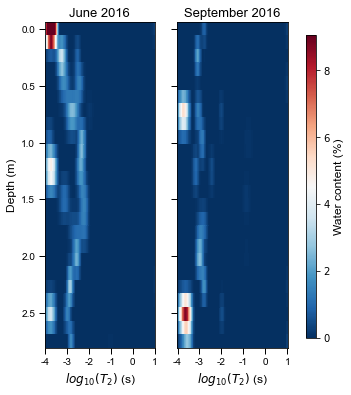

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path
import matplotlib.gridspec as grid_spec

import getBoreholeName as gbn
import interpolation as ip
import loadMat as lmat
import pltpcolormesh as pltpcm
%matplotlib inline

if __name__ =="__main__":    
    fileDir = 'D:/Github/DartPy/example-data/data/'
    figDir = 'D:/Github/DartPy/example-data/figure/'
    
    # when there are many boreholes
    boreholeNames = gbn.getBoreholeName(fileDir)    
    # Dart measurements with two frequencies
    freqs = ['freq1', 'freq2']
    # Dart experiments conducted on Jun and Sep
    months = ['June','sep']   
    # plot NMR measurements using freq2 from Jun and Sep experiments
    freq = freqs[1]

    for i in range(len(boreholeNames)): # transveral all boreholes       
        
        fig = plt.figure(figsize=(5,6)) 
        gs = grid_spec.GridSpec(ncols = len(months), nrows = 1)
        ax = []    
        T2 = []
        depth = []
        T2dist = []
        T2ml = []
        
        for j in range(len(months)): 
            # for j in a_index: 
            ax.append(fig.add_subplot(gs[0, j]))
            
            fileName = boreholeNames[i] + '_' + freq + '_' +  months[j]     
            path2MatFile = os.path.join(fileDir, fileName + '.mat')   
            
            print("working on %s"%fileName)
            # load mat file
            T2_mat, depth_mat, T2dist_mat, T2ml_mat = lmat.loadMat(path2MatFile)  
            T2.append(T2_mat)
            depth.append(depth_mat)
            T2dist.append(T2dist_mat)
            T2ml.append(T2ml_mat)
        # set vmin(=0) and vmax values the same in the colorbar for both June and Sep T2-dist data 
        T2dist_max = min(np.array(T2dist[0]).max(),np.array(T2dist[1]).max())
        T2dist_min = 0
        
        # another method to make a 2-D grid mesh
        T2_June, depth_June,T2dist_June = ip.interpolation_RBS(T2[0], depth[0], T2dist[0])   
        image_June = pltpcm.pltpcolormesh(T2_June, depth_June, T2dist_June, ax[0], T2dist_max)       
       
        T2_Sep, depth_Sep,T2dist_Sep = ip.interpolation_RBS(T2[1], depth[1], T2dist[1]) 
        image_Sep = pltpcm.pltpcolormesh(T2_Sep, depth_Sep,T2dist_Sep, ax[1], T2dist_max)
        
        ax[0].set_title('June 2016',fontname="Arial", fontsize=13)      
        ax[1].get_yaxis().set_ticklabels([])
        ax[1].set_ylabel('')
        ax[1].set_title('September 2016',fontname="Arial", fontsize=13) 
        # add a common colorbar
        fig.subplots_adjust(right = 0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
        cbar = fig.colorbar(image_Sep, cax = cbar_ax)
        cbar.set_label('Water content (%)',fontname="Arial", fontsize=12)
        cbar.ax.tick_params(labelsize= 10)
        
#        fig.savefig(os.path.join(figDir, boreholeNames[i] + '_' + freq + '_JunandSep_T2dist.eps'),dpi=300)
        fig.savefig(os.path.join(figDir, boreholeNames[i] + '_' + freq + '_JunandSep_T2dist.svg'), format='svg', dpi=1000)
        fig.savefig(os.path.join(figDir, boreholeNames[i] + '_' + freq + '_JunandSep_T2dist.png'), bbox_inches='tight')
        plt.show()